## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = '/Volumes/AirStorage/~Python'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'PvtyCen 95-20 Update Mod.csv'),encoding = 'unicode_escape', on_bad_lines='skip', sep = ";")

In [5]:
df.shape

(1326, 293)

In [6]:
df.head()

,ï»¿Year,State,Total population,Number in poverty,Margin of error (Â±) (34),Percent in poverty,Margin of error (Â±) (34).1,Lowest\nfifth,Second\nfifth,Middle\nfifth,...,Percent in poverty.1,Percent of poverty population,18 to 64 years Total,Number in poverty 18-64,Percent in poverty.2,Percent of poverty population.1,65 years and over Total,Number in poverty 65+,Percent in poverty.3,Percent of poverty population.2
0,2020,Alabama,5.001,744.000,139,"14,9","2,8","14666,0","39743,0","68235,0",...,"16,00","31,40",199753,20907,"10,50","55,70",54276,4852,"8,90","12,90"
1,2020,Alaska,708.000,95.000,16,"13,4","2,2","14666,0","39743,0","68235,0",...,"16,00","31,40",199753,20907,"10,50","55,70",54276,4852,"8,90","12,90"
2,2020,Arizona,7.203,783.000,122,"10,9","1,7","14666,0","39743,0","68235,0",...,"16,00","31,40",199753,20907,"10,50","55,70",54276,4852,"8,90","12,90"
3,2020,Arkansas,2.974,420.000,56,"14,1","1,8","14666,0","39743,0","68235,0",...,"16,00","31,40",199753,20907,"10,50","55,70",54276,4852,"8,90","12,90"
4,2020,California,39.203,4.332,302,"11,1","0,8","14666,0","39743,0","68235,0",...,"16,00","31,40",199753,20907,"10,50","55,70",54276,4852,"8,90","12,90"


In [7]:
df.rename(columns = {'ï»¿Year' : 'Year', 'Percent in poverty.1': 'Percent <18', 'Percent in poverty.2': 'Percent 18-64', 'Percent in poverty.3': 'Percent 65+'}, inplace = True) 

In [8]:
df.head(8)


,Year,State,Total population,Number in poverty,Margin of error (Â±) (34),Percent in poverty,Margin of error (Â±) (34).1,Lowest\nfifth,Second\nfifth,Middle\nfifth,...,Percent <18,Percent of poverty population,18 to 64 years Total,Number in poverty 18-64,Percent 18-64,Percent of poverty population.1,65 years and over Total,Number in poverty 65+,Percent 65+,Percent of poverty population.2
0,2020,Alabama,5.001,744.000,139,"14,9","2,8","14666,0","39743,0","68235,0",...,"16,00","31,40",199753,20907,"10,50","55,70",54276,4852,"8,90","12,90"
1,2020,Alaska,708.000,95.000,16,"13,4","2,2","14666,0","39743,0","68235,0",...,"16,00","31,40",199753,20907,"10,50","55,70",54276,4852,"8,90","12,90"
2,2020,Arizona,7.203,783.000,122,"10,9","1,7","14666,0","39743,0","68235,0",...,"16,00","31,40",199753,20907,"10,50","55,70",54276,4852,"8,90","12,90"
3,2020,Arkansas,2.974,420.000,56,"14,1","1,8","14666,0","39743,0","68235,0",...,"16,00","31,40",199753,20907,"10,50","55,70",54276,4852,"8,90","12,90"
4,2020,California,39.203,4.332,302,"11,1","0,8","14666,0","39743,0","68235,0",...,"16,00","31,40",199753,20907,"10,50","55,70",54276,4852,"8,90","12,90"
5,2020,Colorado,5.717,546.000,144,"9,5","2,5","14666,0","39743,0","68235,0",...,"16,00","31,40",199753,20907,"10,50","55,70",54276,4852,"8,90","12,90"
6,2020,Connecticut,3.545,396.000,80,"11,2","2,3","14666,0","39743,0","68235,0",...,"16,00","31,40",199753,20907,"10,50","55,70",54276,4852,"8,90","12,90"
7,2020,Delaware,991.000,104.000,22,"10,5","2,2","14666,0","39743,0","68235,0",...,"16,00","31,40",199753,20907,"10,50","55,70",54276,4852,"8,90","12,90"


In [9]:
## List columns for dropping
## Removing unneeded data
## Removing all State and Country columns

list(df.columns)


['Year',
 'State',
 'Total population',
 'Number in poverty',
 'Margin of error (Â±) (34)',
 'Percent in poverty',
 'Margin of error (Â±) (34).1',
 'Lowest\nfifth',
 'Second\nfifth',
 'Middle\nfifth',
 'Fourth\nfifth',
 'Highest\nfifth',
 'Top 5\npercent',
 'US GDP Growth in %',
 'Aruba',
 'Africa Eastern and Southern',
 'Afghanistan',
 'Africa Western and Central',
 'Angola',
 'Albania',
 'Andorra',
 'Arab World',
 'United Arab Emirates',
 'Argentina',
 'Armenia',
 'American Samoa',
 'Antigua and Barbuda',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Burundi',
 'Belgium',
 'Benin',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'Bahrain',
 'Bahamas, The',
 'Bosnia and Herzegovina',
 'Belarus',
 'Belize',
 'Bermuda',
 'Bolivia',
 'Brazil',
 'Barbados',
 'Brunei Darussalam',
 'Bhutan',
 'Botswana',
 'Central African Republic',
 'Canada',
 'Central Europe and the Baltics',
 'Switzerland',
 'Channel Islands',
 'Chile',
 'China',
 "Cote d'Ivoire",
 'Cameroon',
 'Congo, Dem. Rep.',
 'Congo, Re

In [10]:
df_sub2 = [
    'Year',
    'Total population',
    'Number in poverty',
    'Percent in poverty',
    'Lowest\nfifth',
    'Second\nfifth',
    'Middle\nfifth',
    'Fourth\nfifth',
    'Highest\nfifth',
    'Top 5\npercent',
    'US GDP Growth in %',
    'Poverty population, all ages',
    'Under 18 years Total',
    'Number in poverty U18',
    'Percent <18',
    'Percent of poverty population',
    '18 to 64 years Total',
    'Number in poverty 18-64',
    'Percent 18-64',
    'Percent of poverty population.1',
    '65 years and over Total',
    'Number in poverty 65+',
    'Percent 65+',
    'Percent of poverty population.2'
]

df = df[df_sub2]


In [11]:
df.head(8)

,Year,Total population,Number in poverty,Percent in poverty,Lowest\nfifth,Second\nfifth,Middle\nfifth,Fourth\nfifth,Highest\nfifth,Top 5\npercent,...,Percent <18,Percent of poverty population,18 to 64 years Total,Number in poverty 18-64,Percent 18-64,Percent of poverty population.1,65 years and over Total,Number in poverty 65+,Percent 65+,Percent of poverty population.2
0,2020,5.001,744.000,"14,9","14666,0","39743,0","68235,0","110255,0","254445,0","447570,0",...,"16,00","31,40",199753,20907,"10,50","55,70",54276,4852,"8,90","12,90"
1,2020,708.000,95.000,"13,4","14666,0","39743,0","68235,0","110255,0","254445,0","447570,0",...,"16,00","31,40",199753,20907,"10,50","55,70",54276,4852,"8,90","12,90"
2,2020,7.203,783.000,"10,9","14666,0","39743,0","68235,0","110255,0","254445,0","447570,0",...,"16,00","31,40",199753,20907,"10,50","55,70",54276,4852,"8,90","12,90"
3,2020,2.974,420.000,"14,1","14666,0","39743,0","68235,0","110255,0","254445,0","447570,0",...,"16,00","31,40",199753,20907,"10,50","55,70",54276,4852,"8,90","12,90"
4,2020,39.203,4.332,"11,1","14666,0","39743,0","68235,0","110255,0","254445,0","447570,0",...,"16,00","31,40",199753,20907,"10,50","55,70",54276,4852,"8,90","12,90"
5,2020,5.717,546.000,"9,5","14666,0","39743,0","68235,0","110255,0","254445,0","447570,0",...,"16,00","31,40",199753,20907,"10,50","55,70",54276,4852,"8,90","12,90"
6,2020,3.545,396.000,"11,2","14666,0","39743,0","68235,0","110255,0","254445,0","447570,0",...,"16,00","31,40",199753,20907,"10,50","55,70",54276,4852,"8,90","12,90"
7,2020,991.000,104.000,"10,5","14666,0","39743,0","68235,0","110255,0","254445,0","447570,0",...,"16,00","31,40",199753,20907,"10,50","55,70",54276,4852,"8,90","12,90"


In [12]:
df.describe()

,Year,Total population,Number in poverty,"Poverty population, all ages",Under 18 years Total,Number in poverty U18,18 to 64 years Total,Number in poverty 18-64,65 years and over Total,Number in poverty 65+
count,1326.00000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000
mean,2007.50000,114.628011,314.063437,38692.846154,72931.615385,13550.000000,185212.576923,21299.615385,40086.000000,3843.115385
std,7.50283,258.148971,286.254956,4605.187408,1099.207958,1538.580168,11892.653239,3214.317209,7430.962588,572.529808
min,1995.00000,1.008000,1.000000,31581.000000,70566.000000,10466.000000,161508.000000,16671.000000,31658.000000,3222.000000
25%,2001.00000,2.925000,61.000000,35574.000000,72021.000000,12280.000000,175685.000000,18638.000000,33769.000000,3414.000000
50%,2007.50000,5.697500,241.000000,37158.000000,73320.500000,13288.500000,188549.000000,20497.500000,37289.000000,3567.000000
75%,2014.00000,12.563750,543.000000,43123.000000,73719.000000,14659.000000,196254.000000,24414.000000,45994.000000,4231.000000
max,2020.00000,999.000000,991.000000,46657.000000,74579.000000,16286.000000,199753.000000,26527.000000,54642.000000,5146.000000


In [13]:
## Further cleaning needed due to ',' in values with percentages. and in Population.
# List of columns that may contain percentage values with commas
percentage_columns = [
    'Percent in poverty',
    'Percent <18',
    'Percent 18-64',
    'Percent 65+',
    'Percent of poverty population',
    'Percent of poverty population.1',
    'Percent of poverty population.2'
]

## Replace commas with periods in percentage columns
for column in percentage_columns:
    df[column] = df[column].str.replace(',', '.')
    
    
## Same with the income nth columns.
# List of columns to process
nfifth_columns = [
    'Lowest\nfifth',
    'Second\nfifth',
    'Middle\nfifth',
    'Fourth\nfifth',
    'Highest\nfifth',
    'Top 5\npercent'
]
## Remove everything after comma and convert to floats
for column in nfifth_columns:
    df[column] = df[column].str.replace(',', '').astype(float)
    
## And a negative value in the US GDP column
df['US GDP Growth in %'] = df['US GDP Growth in %'].str.replace(',', '').astype(float)


### 2. The elbow technique

In [14]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [15]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/ecc/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ecc/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ecc/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ecc/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ecc/anaconda3/lib/pyt

[-917326910009017.5,
 -288860363030877.8,
 -106254067642982.0,
 -68937962965854.64,
 -37104228755732.22,
 -23349704332245.707,
 -14283571815573.3,
 -9185519034654.564,
 -6797898673712.59]

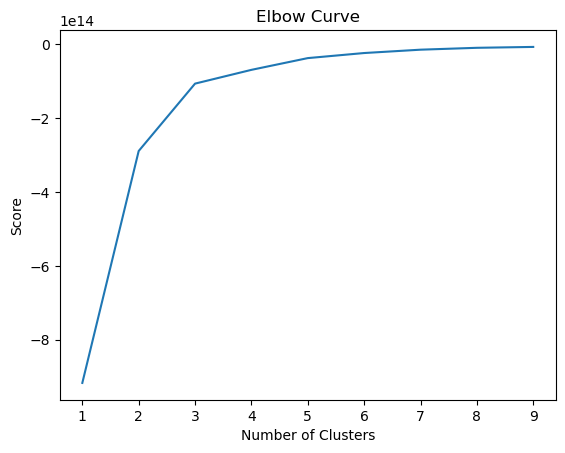

In [16]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

In [17]:
print(sklearn.__version__)

1.2.2


In [18]:
df.to_pickle(os.path.join(r'/Volumes/AirStorage/~Python/02 Data/Prepared Data/PovertyClustering.pkl'))

### 3. k-means clustering

In [19]:
subset = df[['US GDP Growth in %', 'Year', 'Percent in poverty', 'Total population', 'Percent <18',
    'Percent 18-64',
    'Percent 65+',]]
subset['Percent in poverty'] = pd.to_numeric(subset['Percent in poverty'])
subset['Rounded Poverty Percent'] = subset['Percent in poverty'].round()

subset.head()

/var/folders/ph/qwg_wm1d1v36672flxtk3xfc0000gn/T/ipykernel_5962/2113412790.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Percent in poverty'] = pd.to_numeric(subset['Percent in poverty'])
/var/folders/ph/qwg_wm1d1v36672flxtk3xfc0000gn/T/ipykernel_5962/2113412790.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Rounded Poverty Percent'] = subset['Percent in poverty'].round()


,US GDP Growth in %,Year,Percent in poverty,Total population,Percent <18,Percent 18-64,Percent 65+,Rounded Poverty Percent
0,-277.0,2020,14.9,5.001,16.00,10.50,8.90,15.0
1,-277.0,2020,13.4,708.000,16.00,10.50,8.90,13.0
2,-277.0,2020,10.9,7.203,16.00,10.50,8.90,11.0
3,-277.0,2020,14.1,2.974,16.00,10.50,8.90,14.0
4,-277.0,2020,11.1,39.203,16.00,10.50,8.90,11.0


In [20]:
df = subset

## The following was to corect the incorrect decimal placement when addind to subset. Evaluate for future data.

df['US GDP Growth in %'] = df['US GDP Growth in %'] / 100

In [21]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 
X = subset[['Rounded Poverty Percent']]

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
subset['Cluster'] = kmeans.fit_predict(X)

/Users/ecc/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
# Fit the k-means object to the data.

kmeans.fit(df)

/Users/ecc/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [23]:
df['clusters'] = kmeans.fit_predict(df)

/Users/ecc/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
subset.head()

,US GDP Growth in %,Year,Percent in poverty,Total population,Percent <18,Percent 18-64,Percent 65+,Rounded Poverty Percent,Cluster,clusters
0,-2.77,2020,14.9,5.001,16.00,10.50,8.90,15.0,4,0
1,-2.77,2020,13.4,708.000,16.00,10.50,8.90,13.0,4,3
2,-2.77,2020,10.9,7.203,16.00,10.50,8.90,11.0,0,0
3,-2.77,2020,14.1,2.974,16.00,10.50,8.90,14.0,4,0
4,-2.77,2020,11.1,39.203,16.00,10.50,8.90,11.0,0,0


In [25]:
df['clusters'].value_counts()

0    1121
1      68
3      54
2      46
4      37
Name: clusters, dtype: int64

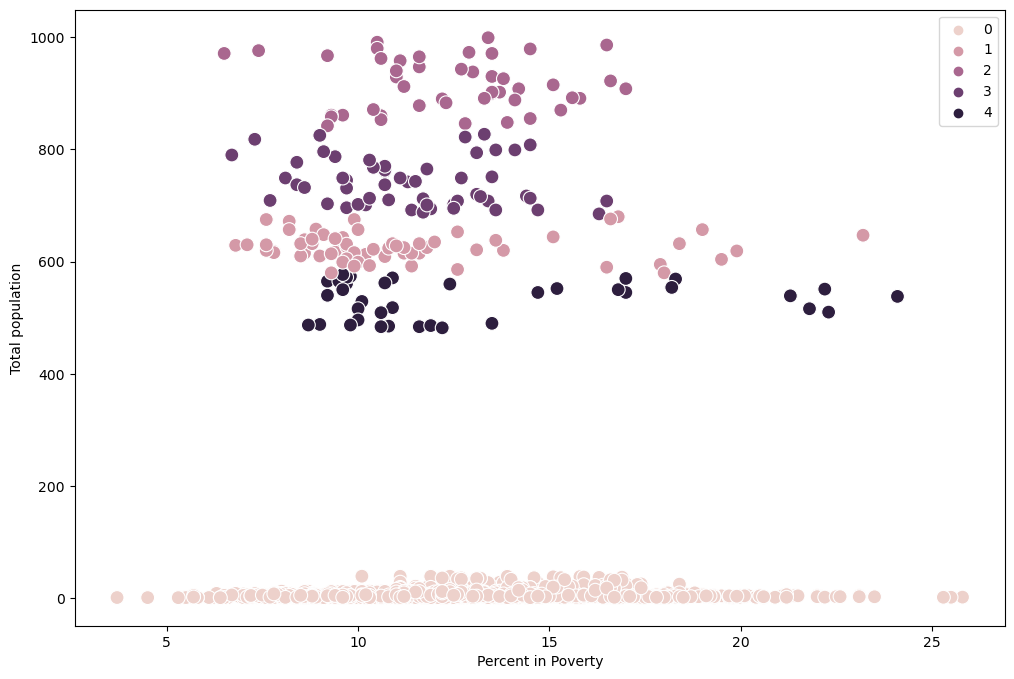

In [26]:
# Plot the clusters for the two variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=subset['Percent in poverty'], y=df['Total population'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Percent in Poverty') # Label x-axis.
plt.ylabel('Total population') # Label y-axis.
plt.show()

In [27]:
## This is at least a better overview of the data.
## It has 5 clusters, with '0' being the most populated, but there can't be tzero population

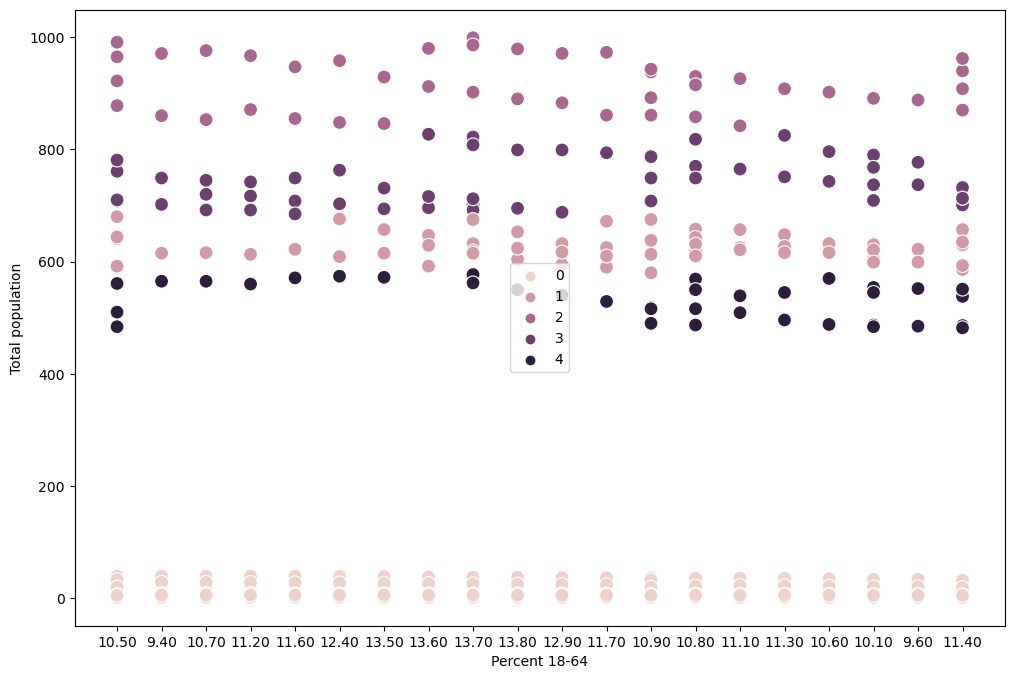

In [28]:
# Plot the clusters for the variables ??.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(y=df['Total population'], x=df['Percent 18-64'], hue=kmeans.labels_, s=100)
ax.grid(False) 

plt.xlabel('Percent 18-64') 
plt.ylabel('Total population') 
plt.show()

In [29]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [30]:
df['Total population'] = pd.to_numeric(df['Total population'], errors='coerce')
df['Percent in poverty'] = pd.to_numeric(df['Percent in poverty'], errors='coerce')
df['Percent 18-64'] = pd.to_numeric(df['Percent 18-64'], errors='coerce')
## This was inserted due to an error with the .agg function
## From ChatGPT 'It looks like you're encountering an error related to using the groupby 
## and agg functions in pandas. The error message indicates that there is an issue with converting strings
## to float values, which is likely causing the error during the aggregation process.'

## 'Data Type Conversion: Convert the columns to the appropriate numeric data type if needed. 
##  You can use the pd.to_numeric function to achieve this. For example:' Then the code supplied above, which worked.

In [31]:
df.groupby('cluster').agg({'Total population':['mean', 'median'], 
                         'Percent in poverty':['mean', 'median'],
                          'Percent 18-64':['mean', 'median']})

Total population          Percent in poverty        Percent 18-64  \
                        mean   median               mean median          mean   
cluster                                                                         
dark purple       916.043478  910.000          12.391304  12.75     11.606522   
pink                6.788351    4.868          12.584567  12.10     11.469848   
purple            625.455882  622.000          11.207353   9.90     11.489706   

                    
            median  
cluster             
dark purple  11.25  
pink         11.20  
purple       11.10